In [1]:
import numpy as np
import tensorflow as tf

In [4]:
corpus_raw = 'He is the king . The king is royal . she is the royal queen '

In [6]:
# Convert to lower case 
corpus_raw = corpus_raw.lower()
print corpus_raw 

he is the king . the king is royal . she is the royal queen 


In [21]:
words = []
#becuase we dont want to treat . as word 
for word in corpus_raw.split():
    if word != '.':
        words.append(word)

In [23]:
# remove all duplicate word 
words = set (words)
print words

set(['king', 'she', 'is', 'queen', 'royal', 'the', 'he'])


In [28]:
word2int = {}
int2word = {}
# Give the total number of unique words 
vocab_size = len(words)
print('give the total number of unique words')
print vocab_size 
### 
for i, word in enumerate(words):
    word2int[word] = i 
    int2word[i] = word

give the total number of unique words
7


In [29]:
# The dictionaries allow us to do : 
print (word2int['queen'])

3


In [32]:
print (int2word[3])

queen


In [34]:
# we want a list if our sentences as a list of words:
# raw_sentencce is a list of sentences
raw_sentences = corpus_raw.split('.')
sentences = [] 
for sentence in raw_sentences:
    sentences.append(sentence.split())
# to give us a list of sentences where each senteance is a list of words. 
print (sentences)    

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [41]:
# Now we genterate our traning data 

data = [] 

WINDOW_SIZE = 2 

for sentence in sentences: 
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[(max(word_index - WINDOW_SIZE, 0)): min(word_index + WINDOW_SIZE, len(sentence)+1)] :
                             if nb_word != word: 
                                   data.append([word, nb_word])

In [42]:
print (data)

[['he', 'is'], ['is', 'he'], ['is', 'the'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['king', 'the'], ['king', 'is'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['is', 'she'], ['is', 'the'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [44]:
# now we need to represented the data in ONE-hot-encoder 
# for example 
# for example you have 3 words : tokyo, texas , barcelona
#word2int = ['tokyo'] --> 0 --> [1 0 0]
#word2int = ['barcelona'] --> 1 --> [0 1 0]
#word2int = ['texas '] --> 2 --> [0 0 1]


In [45]:
# Hot encoder vector 
# function to convert number to one hot vertors 
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index]= 1 
    return temp 

In [46]:
# input word 
x_train = [] 
# output word
y_train = []
# 
for data_word in data: 
    x_train.append(to_one_hot(word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1]], vocab_size))
    

In [48]:
# convert them to numpy arrays 
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [49]:
print(x_train)

[[ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]]


In [50]:
print(y_train)

[[ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]]


In [52]:
print(x_train.shape, y_train.shape)
### meaning 27 tranining point where each point has 7 dimensions 

((27, 7), (27, 7))


In [55]:
#### Tensorflow program start Here 
### creating the placeholder  x_train, and y_train 
x = tf.placeholder(tf.float32, shape =(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape =(None, vocab_size))

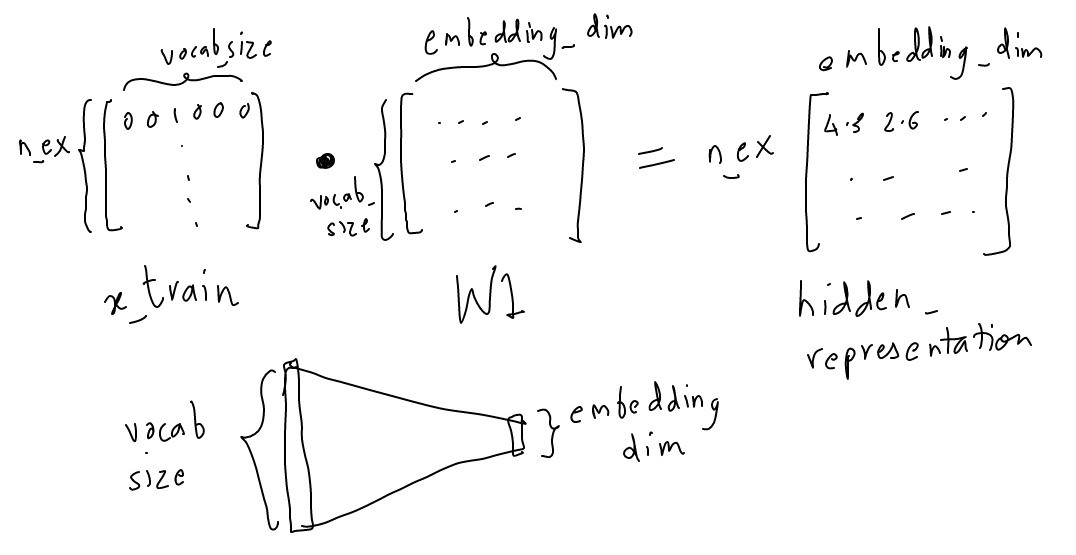

In [58]:
from IPython.display import Image
Image(filename='/home/asabir/Desktop/Embaddig.jpeg')

In [56]:
print y_label

Tensor("Placeholder_2:0", shape=(?, 7), dtype=float32)


In [57]:
print x

Tensor("Placeholder_1:0", shape=(?, 7), dtype=float32)


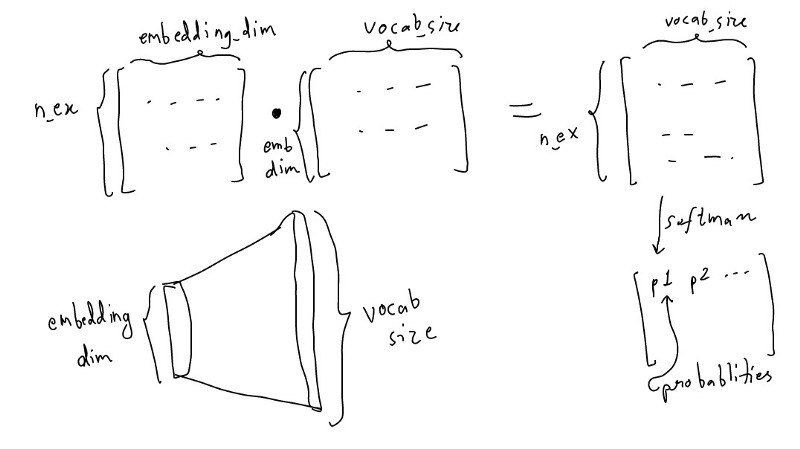

In [63]:
from IPython.display import Image
Image(filename='/home/asabir/Desktop/Embaddig2.jpeg')

In [61]:
# Now we convert it into embadding representation (as figure　↓し)
## you can choose the your own number 
EMBEDDING_DIM = 5 
### W
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
### B 
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
## Hidden 
hidden_representation = tf.add(tf.matmul(x, W1), b1)

In [82]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

In [83]:
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

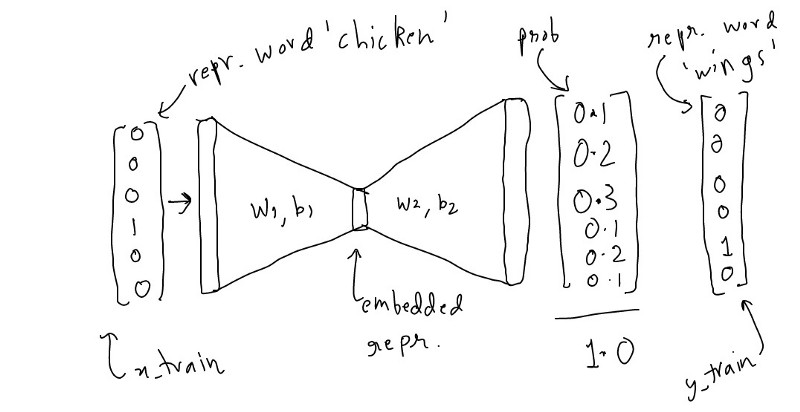

In [65]:
from IPython.display import Image
Image(filename='/home/asabir/Desktop/Embaddig3.jpeg')

In [66]:
## Input_one_hot ---> embedded repr. ----> predicted_neighbour_prob 

In [71]:
# Now, let start the tranining  
sess = tf.Session() 
init = tf.global_variables_initializer()
sess.run(init) 

In [84]:
#define the loss function 
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

In [86]:
#define the tranining stetp 
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

In [87]:
n_iters = 10000

In [91]:
### train for n_iter iterations 
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

FailedPreconditionError: Attempting to use uninitialized value Variable_7
	 [[Node: Variable_7/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_7"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_7)]]

Caused by op u'Variable_7/read', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/asabir/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/asabir/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/asabir/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/asabir/.local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/asabir/.local/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/asabir/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/asabir/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/asabir/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/asabir/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/asabir/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/asabir/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/asabir/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/asabir/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/asabir/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/asabir/.local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/asabir/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/asabir/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/asabir/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-82-32766f10effc>", line 1, in <module>
    W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 199, in __init__
    expected_shape=expected_shape)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 330, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 1400, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_7
	 [[Node: Variable_7/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_7"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_7)]]
